## 2. Machine Learning for Regression

In [40]:
# Importing the libraries for the ML model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

%matplotlib inline


## 2.2 Data preparation

In [41]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [42]:
!wget $data 

--2023-09-25 16:41:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving rb-proxy-de.bosch.com (rb-proxy-de.bosch.com)... 10.4.103.143
Connecting to rb-proxy-de.bosch.com (rb-proxy-de.bosch.com)|10.4.103.143|:8080... connected.
Proxy tunneling failed: Proxy Authentication RequiredUnable to establish SSL connection.


In [72]:
df = pd.read_csv('housing.csv')
df.shape

(20640, 10)

In [73]:
Filter_OceanProximity = ['<1H OCEAN' , 'INLAND']
df = df[df['ocean_proximity'].isin(Filter_OceanProximity)]

In [74]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [76]:
# Inspecting null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Answer 1

total_bedrooms is the feature with missing values of 157

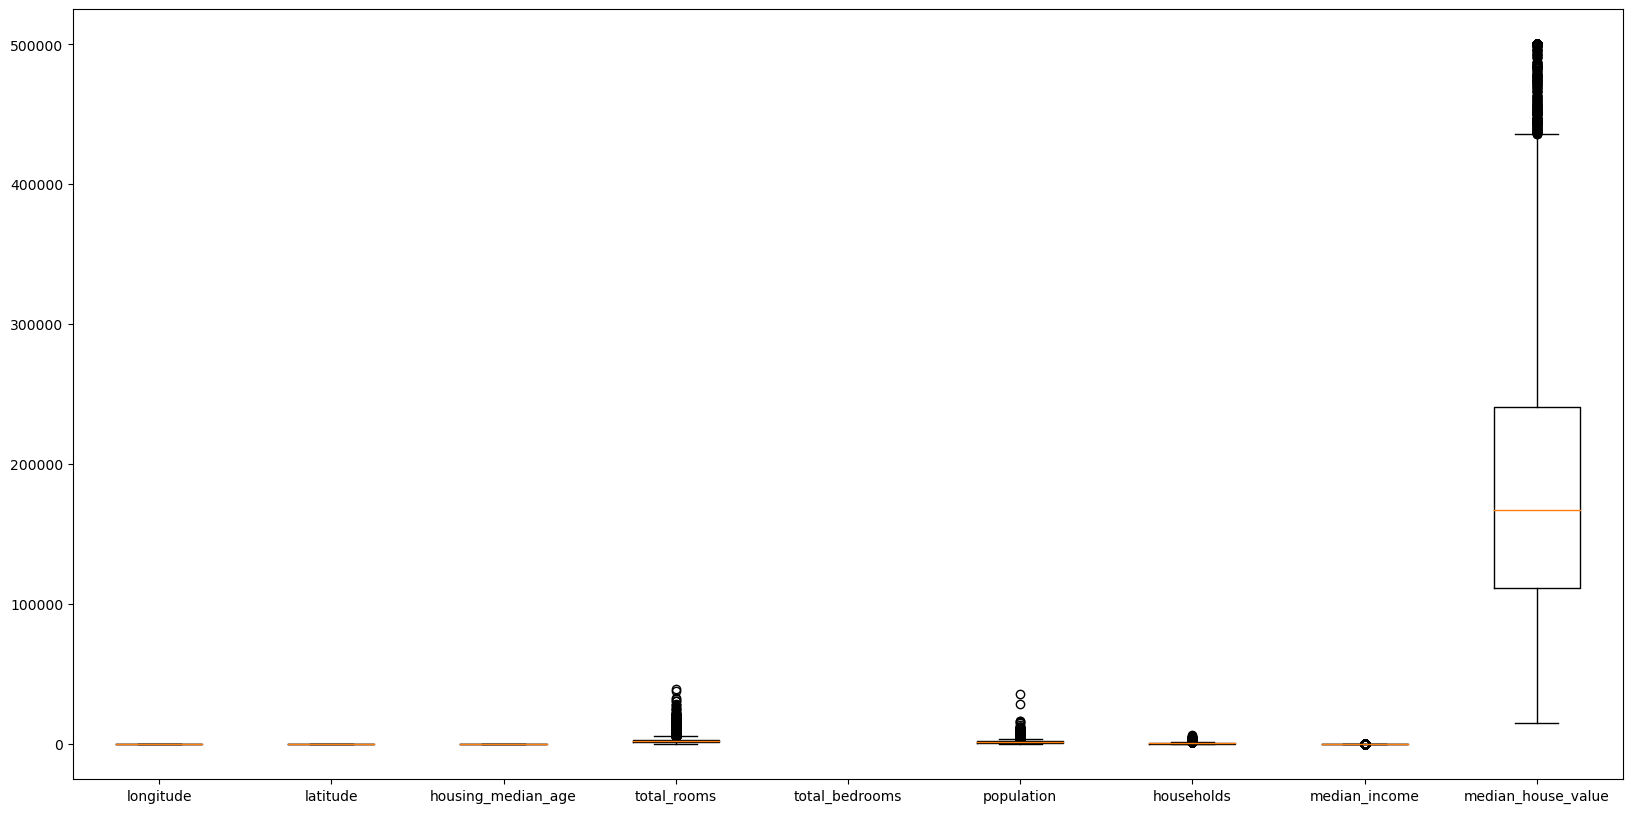

In [77]:
# Plotting boxplot for all the columns to visualise the distribution of the columns features

numerical_cols = df.select_dtypes(include=['float64'])
plt.figure(figsize=(20,10))
plt.boxplot(numerical_cols)
plt.xticks(range(1, len(numerical_cols.columns) + 1), numerical_cols.columns);

Since median_huse_value has higher range than rest of the columns, I will plot it separately from other columns

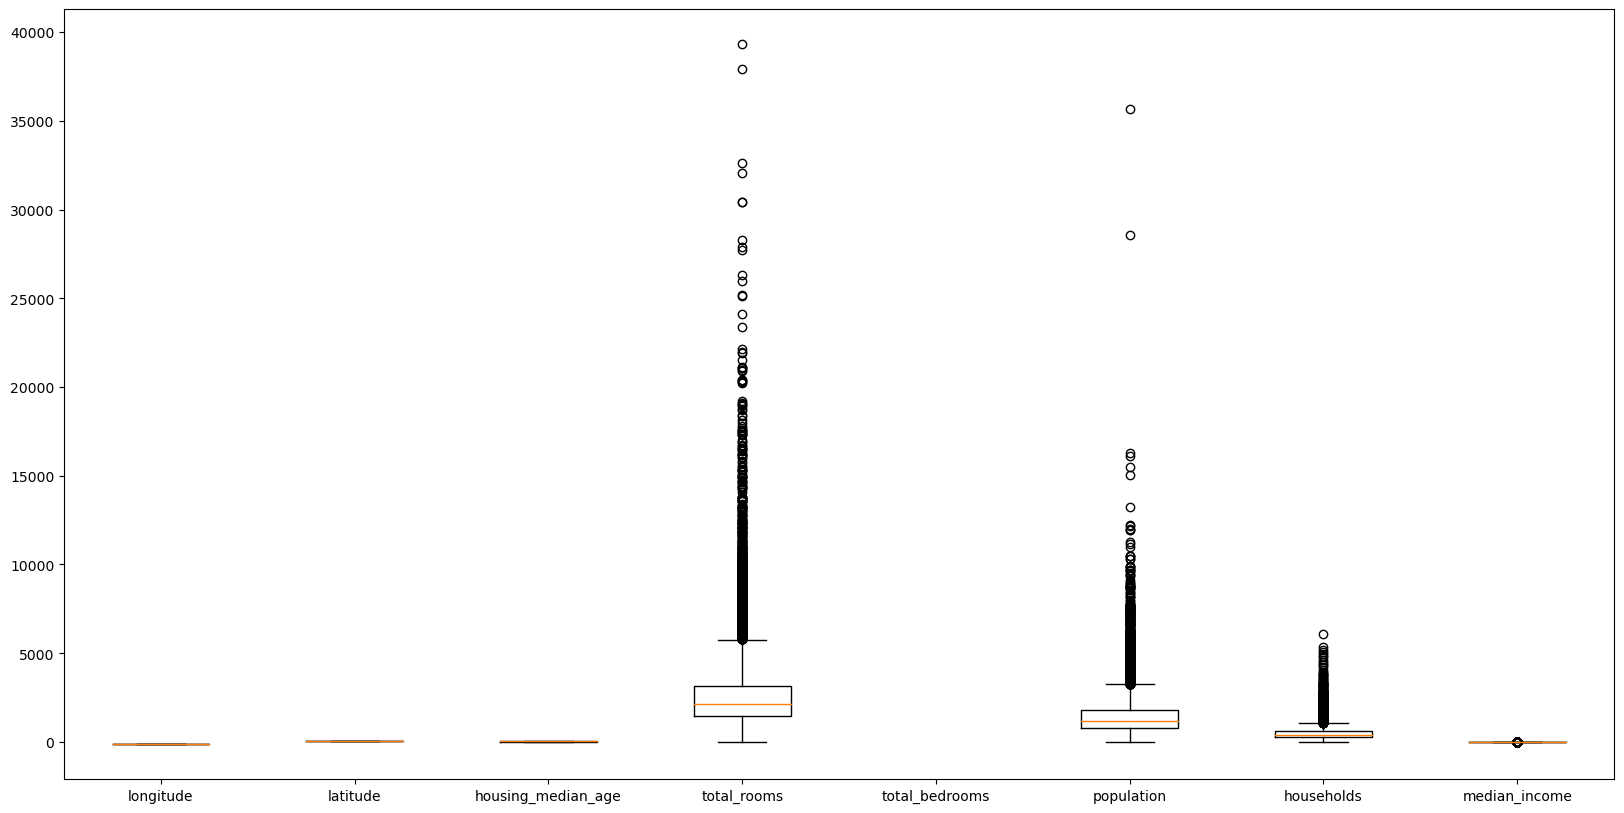

In [78]:
# Plotting boxplot for all the columns to visualise the distribution of the columns features

numerical_cols = df.drop(columns = ['median_house_value','ocean_proximity'])
plt.figure(figsize=(20,10))
plt.boxplot(numerical_cols)
plt.xticks(range(1, len(numerical_cols.columns) + 1), numerical_cols.columns);

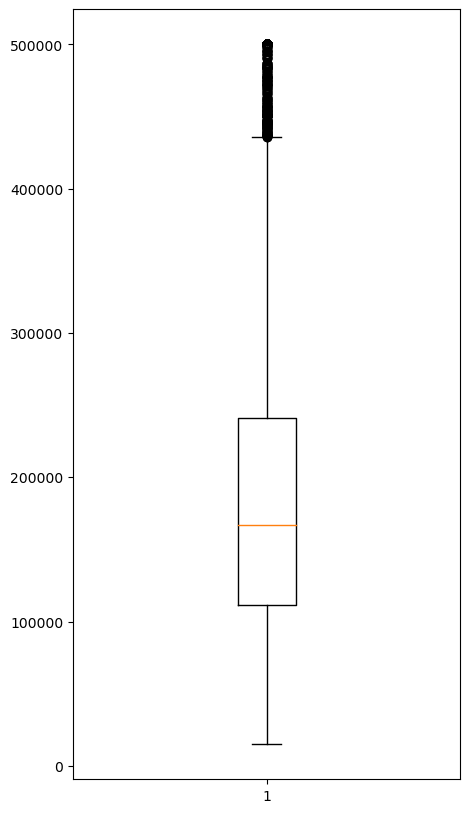

In [79]:
# Plotting boxplot for all the columns to visualise the distribution of the columns features

numerical_cols = df['median_house_value']
numerical_cols.columns = 'median_house_value'
plt.figure(figsize=(5,10))
plt.boxplot(numerical_cols);
#plt.xticks(range(1, len(numerical_cols.columns) + 1), numerical_cols.columns);

C:\Users\PTB3KOR\AppData\Local\Temp\ipykernel_9940\160523070.py:6: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



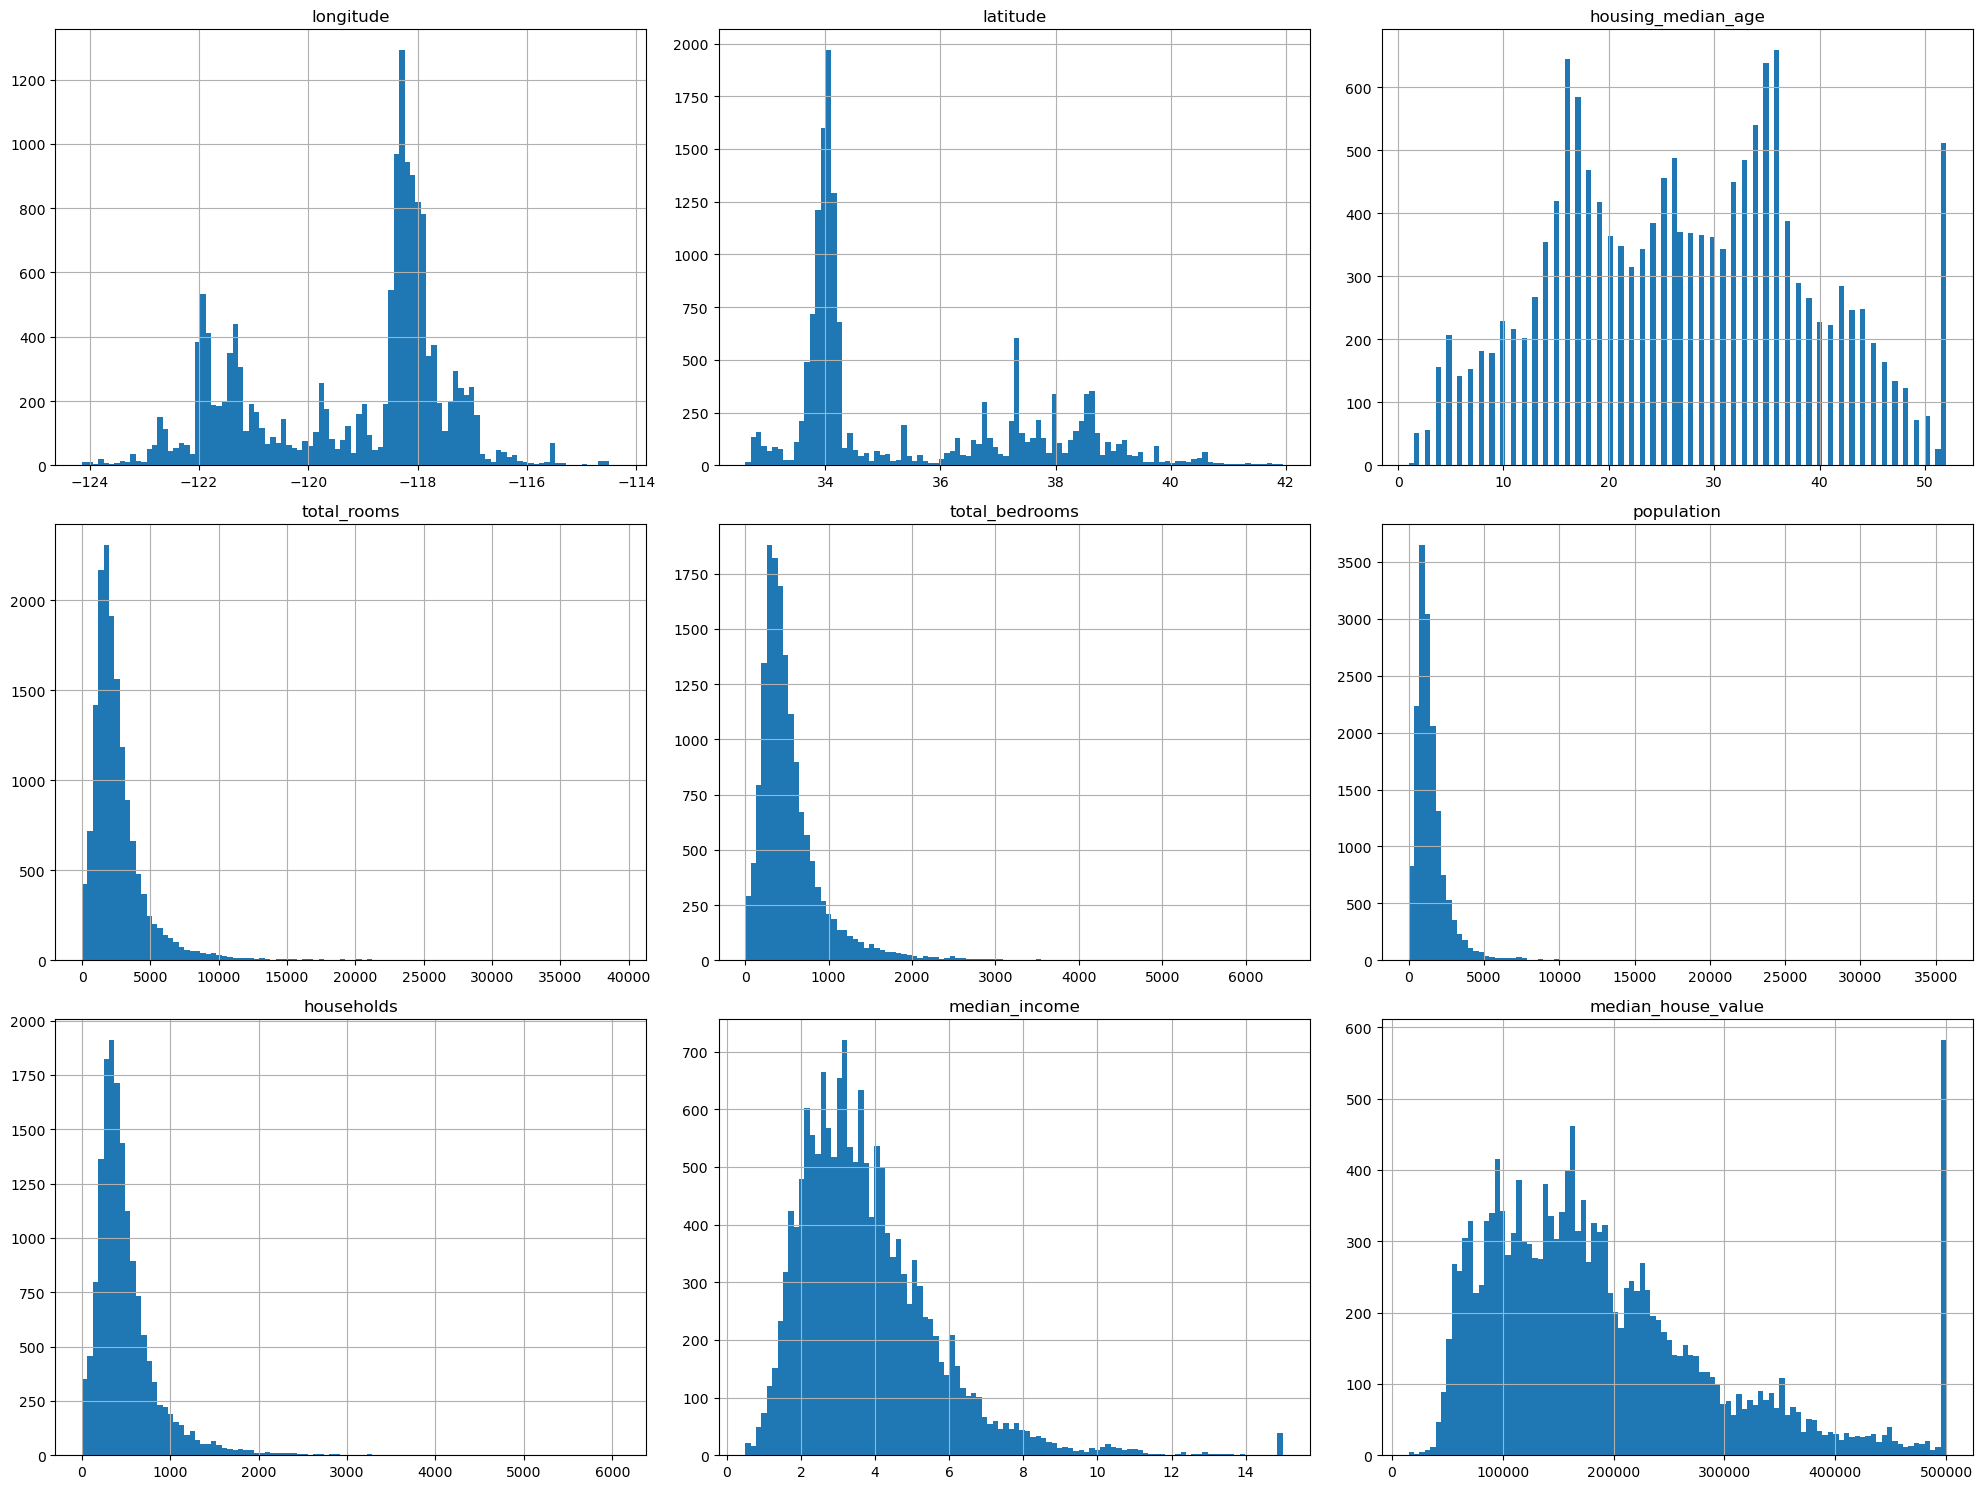

In [80]:
# Displaying in histpgram to check the distribution of values in each class and their frequency
fig = plt.figure(figsize=(20,15))
# Get the current axes
ax = plt.gca()
#plot histogram
df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                                                  "population", "households", "median_income", "median_house_value"])
plt.tight_layout()
plt.show()

## Exploratory data analysis

In [81]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [82]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Answer 2

Median for variable 'population' is 1195.

In [108]:
# Create a scatter mapbox plot
fig = plt.figure(figsize=(10,500))
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color='ocean_proximity',
    mapbox_style="carto-positron",
    labels={'ocean_proximity': "'ocean_proximity'"},
    title="Distribution of Property Types for Sale in Mexico City",
)
fig.show()

<Figure size 1000x50000 with 0 Axes>

In [56]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1h_ocean
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1h_ocean
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1h_ocean
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1h_ocean
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1h_ocean


In [57]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Answer 3 preparation

## Validation framework

In [138]:
#Shuffle the dataset (the filtered one you created above), use seed 42
np.random.seed(42)

# Declaring length of the dataframe df in n
n = len(df)

#Split your data in train/val/test sets, with 60%/20%/20% distribution
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#Shuffling the dataset using shuffle and random seed
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Generating the training, validation and testing dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# reset the indixes of the df_train, df_val, df_test
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [139]:
# Creating target column, y from the dataset df
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

'''Apply the log transformation to the median_house_value variable using 
the np.log1p() function'''
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# Deleting the target column from the feature matrix, X
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Linear Regression Function for closed form of normal equation for Gram matrix

In [140]:
def Linear_Regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [141]:
base = df.drop(columns = ['median_house_value', 'ocean_proximity']).columns
print(len(base))
base

8


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [145]:
# Declaring the function for fillna objective, filling missing values as 0 or mean 
def df_modX(df, fillna_value):
    df_mod = df[base]
    df_mod = df_mod.fillna(fillna_value)
    X = df_mod.values
    return X

# Declaring the function for calculating RMSE value for given target and predicted target values 
def rmse(y_pred, y):
    rmse = np.sqrt(((y_pred - y) ** 2).mean())
    return rmse

## Answer 3 peparation for mean value

In [146]:
# Finding the mean of the total bedrooms columns in training set df_train 
df_mean = df_train['total_bedrooms'].mean()

#train the linear regression model uisng normal equation for gram matrix & without regularization
X_mean_train = df_modX(df_train, fillna_value = df_mean)
bias_mean, weights_mean = Linear_Regression(X_mean_train, y_train)

# Use the validation dataset df_val to evaluate the models and get predicted target vector
X_mean_val = df_modX(df_val, fillna_value = df_mean)
y_mean_pred_val = bias_mean + X_mean_val.dot(weights_mean)

#Getting RMSE value and round it to 2 decimal digits
np.round(rmse(y_mean_pred_val, y_val),2)

0.34

## Answer 3 peparation for fillna = 0

In [120]:
#train the linear regression model uisng normal equation for gram matrix & without regularization

X_fill0_train = df_modX(df_train, fillna_value = 0)
bias_fill0, weights_fill0 = Linear_Regression(X_fill0_train, y_train)

# Use the validation dataset df_val to evaluate the models and get predicted target vector
X_fill0_val = df_modX(df_val, fillna_value = 0)
y_fill0_pred_val = bias_fill0 + X_fill0_val.dot(weights_fill0)

#Getting RMSE value and round it to 2 decimal digits
np.round(rmse(y_val, y_fill0_pred_val),2)

0.34

## Answer3

Both have same value. So c)Both are equally good

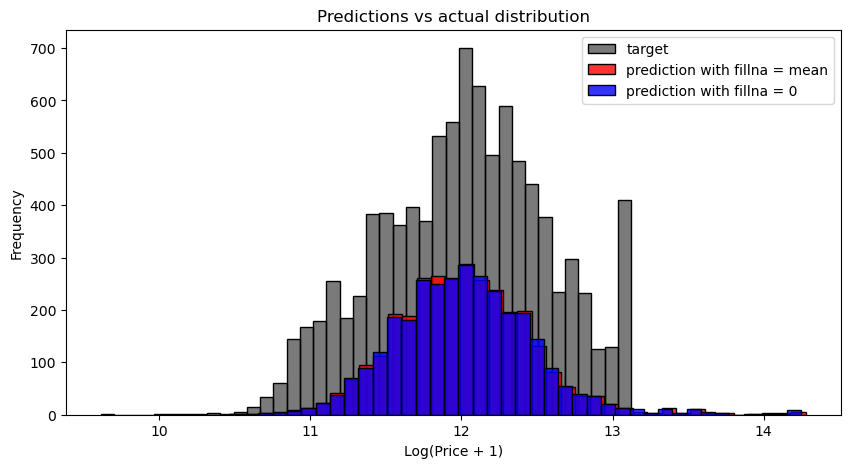

In [121]:
plt.figure(figsize=(10, 5))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_mean_pred_val, label='prediction with fillna = mean', color='red', alpha=0.8, bins=40)
sns.histplot(y_fill0_pred_val, label='prediction with fillna = 0', color=  'blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## REGULARIZATION: Answer 4 preparation

In [122]:
def LinearRegression_Regularization(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [128]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    bias, weights = LinearRegression_Regularization(X_fill0_train, y_train, r=r)
    y_fill0_pred_val_reg = bias + X_fill0_val.dot(weights)
    rmse_val = np.round(rmse(y_val, y_fill0_pred_val_reg),2)
    print("regularization parameter, r is:", r,"\t & RMS Error is:", rmse_val) 

regularization parameter, r is: 0 	 & RMS Error is: 0.34
regularization parameter, r is: 0.001 	 & RMS Error is: 0.34
regularization parameter, r is: 0.01 	 & RMS Error is: 0.34
regularization parameter, r is: 0.1 	 & RMS Error is: 0.34
regularization parameter, r is: 1 	 & RMS Error is: 0.34
regularization parameter, r is: 10 	 & RMS Error is: 0.35


## Answer 4

For different regularization parameter, **r**, which is learning rate for the model, RMSE increases with increase in r. For same RMSE, the lowest r is 0. Hence option a)

## Answer 5 preparation

In [133]:
seed_value = np.arange(0,10)
seed_value


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [147]:
# Creating empty list to store RMSE for seed_values
RMSE = []

for r in seed_value:
    #Shuffle the dataset (the filtered one you created above), use random seed from for loop iterable
    np.random.seed(r)

    # Declaring length of the dataframe df in n
    n = len(df)

    #Split your data in train/val/test sets, with 60%/20%/20% distribution
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    #Shuffling the dataset using shuffle and random seed
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    # Generating the training, validation and testing dataset
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # reset the indixes of the df_train, df_val, df_test
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Creating target column, y from the dataset df
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    '''Apply the log transformation to the median_house_value variable using 
    the np.log1p() function'''

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # Deleting the target column from the feature matrix, X
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    #train the linear regression model uisng normal equation for gram matrix & without regularization

    X_fill0_train = df_modX(df_train, fillna_value = 0)
    bias_fill0, weights_fill0 = Linear_Regression(X_fill0_train, y_train)

    # Use the validation dataset df_val to evaluate the models and get predicted target vector
    X_fill0_val = df_modX(df_val, fillna_value = 0)
    y_fill0_pred_val = bias_fill0 + X_fill0_val.dot(weights_fill0)

    #Getting RMSE value and round it to 2 decimal digits
    #rmse = np.round(rmse(y_val, y_fill0_pred_val),2)
    RMSE.append(np.round(rmse(y_val, y_fill0_pred_val),2))

RMSE

[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]

In [149]:
# Calculating the RMSE of standard deviation of RMSE
np.round(np.std(RMSE),3)

0.006

## Answer 5

Answer for 5 is c) 0.005

## Answer 6 preparation

In [151]:
#Shuffle the dataset (the filtered one you created above), use random seed from for loop iterable
np.random.seed(9)

# Declaring length of the dataframe df in n
n = len(df)

#Split your data in train/val/test sets, with 60%/20%/20% distribution
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#Shuffling the dataset using shuffle and random seed
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Generating the training, validation and testing dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# reset the indixes of the df_train, df_val, df_test
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
# Creating target column, y from the dataset df
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

'''Apply the log transformation to the median_house_value variable using 
the np.log1p() function'''

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# Deleting the target column from the feature matrix, X
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Combine the test and validation datasets for X and y datasets
df_train_val = pd.concat([df_train, df_val])
y_train_val  = np.concatenate((y_train, y_val))
    
#train the linear regression model uisng normal equation for gram matrix & with regularization
X_fill0_train = df_modX(df_train_val, fillna_value = 0)
bias_fill0, weights_fill0 = LinearRegression_Regularization(X_fill0_train, y_train_val)

# Use the test dataset y_test to evaluate the models and get predicted target vector
X_fill0_test = df_modX(df_test, fillna_value = 0)
y_fill0_pred_test = bias_fill0 + X_fill0_test.dot(weights_fill0)

#Getting RMSE value and round it to 2 decimal digits
np.round(rmse(y_test, y_fill0_pred_test),2)

0.33

## Answer 6

Answer for 6 is c) 0.33